In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder ,FunctionTransformer ,MinMaxScaler , StandardScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('loan-dataset.csv')

In [3]:
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].mean())

In [22]:
df

,gender,marital_status,dependents,education,employed,income,spouse_income,loan_amount,monthly_installment,credit_history,property,loan_approval
0,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0,187.000000,360.0,1.0,Urban,Y


###### 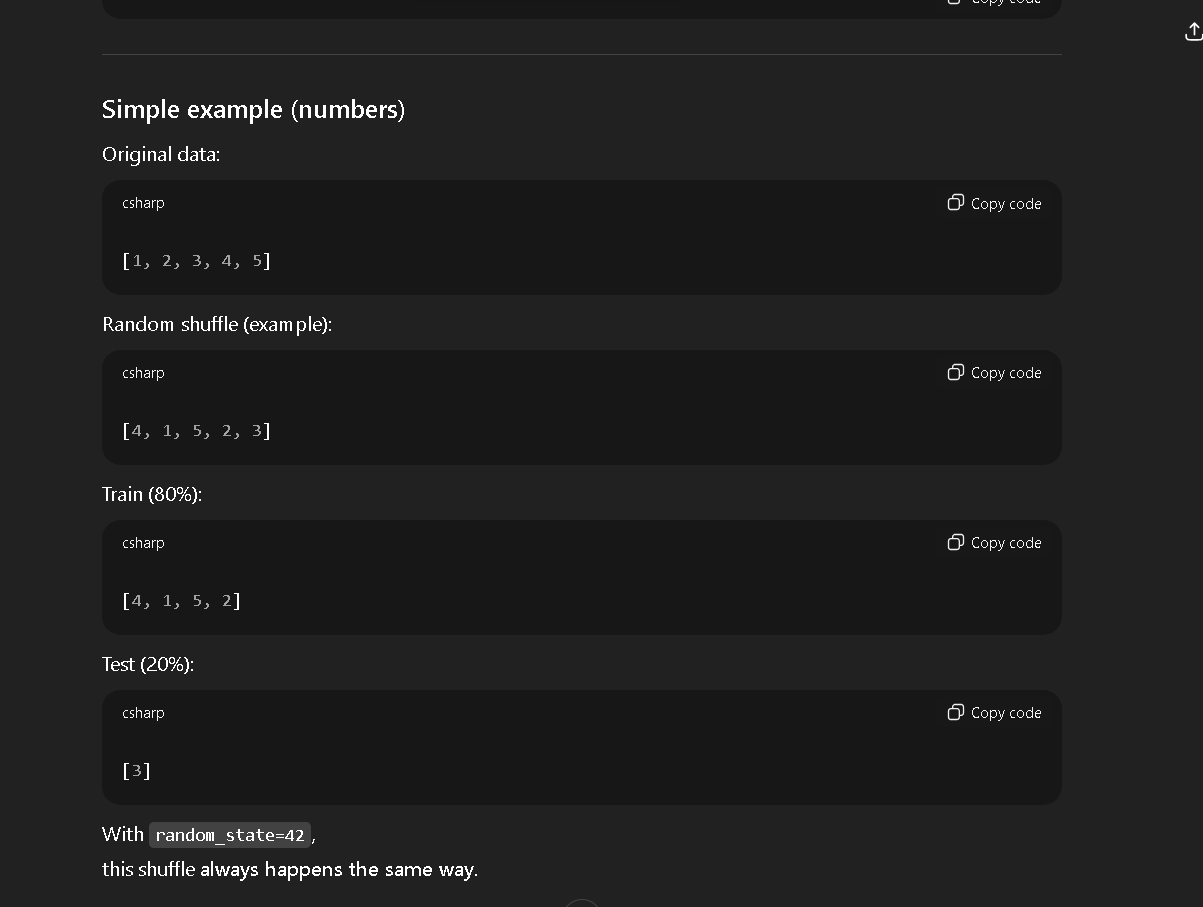
how randome_state work 


In [14]:
x_train , x_test , y_train , y_test = train_test_split(df.drop('loan_approval',axis=1),df['loan_approval'],test_size=0.3,random_state=42) 
y_train

553    N
601    Y
261    Y
496    Y
529    Y
      ..
71     Y
106    Y
270    Y
435    Y
102    Y
Name: loan_approval, Length: 429, dtype: object

In [15]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# y_train 
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0])

Text(0.5, 1.0, 'Income Q-Q plot ')

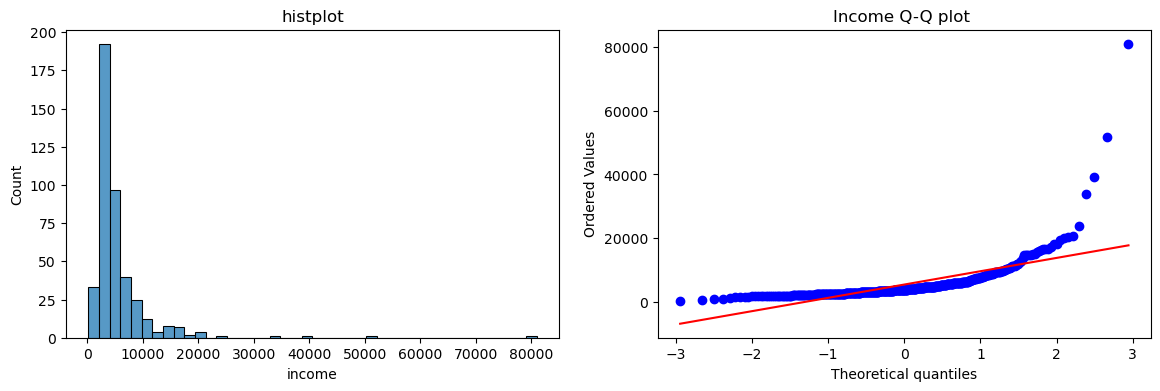

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['income'])
plt.title('histplot')

plt.subplot(122)
stats.probplot(x_train['income'],dist='norm',plot=plt)
plt.title('Income Q-Q plot ')

Text(0.5, 1.0, 'Income Q-Q plot ')

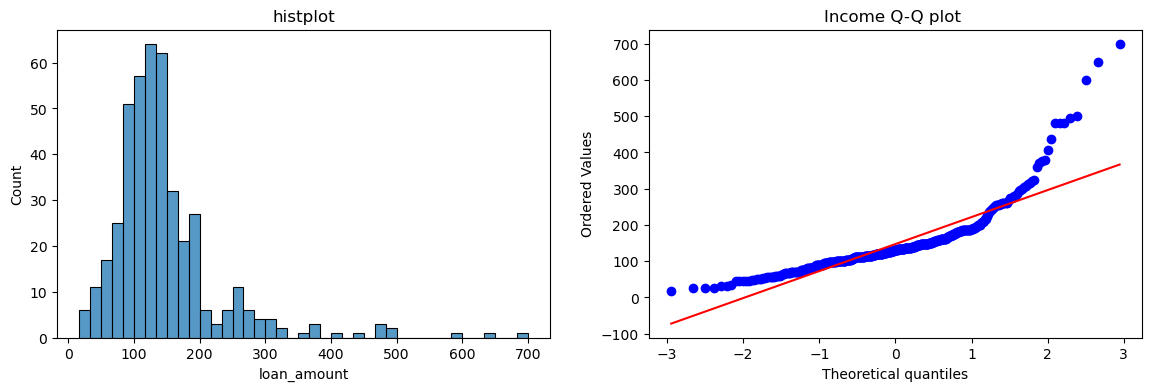

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['loan_amount'])
plt.title('histplot')

plt.subplot(122)
stats.probplot(x_train['loan_amount'],dist='norm',plot=plt)
plt.title('Income Q-Q plot ')

In [18]:
m1 =  LogisticRegression()
m2 = DecisionTreeClassifier()

m1.fit(x_train[['loan_amount','income']],y_train)
m2.fit(x_train[['loan_amount','income']],y_train)
y_pred = m1.predict(x_test[['loan_amount','income']])
y_pred1 = m2.predict(x_test[['loan_amount','income']])

print(accuracy_score(y_pred, y_test))
print(accuracy_score(y_pred1,y_test))

0.6486486486486487
0.5675675675675675
